#Import Libraries

##Neptune Ai

In [1]:
! pip install neptune-client==0.4.132


In [2]:
pip install  neptune-contrib neptune-client


In [3]:
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
neptune.init(project_qualified_name='jathurshan0330/DataStorm2-round1', # change this to your `workspace_name/project_name`
             api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZmJkZjYxNGYtMTA0ZC00ZTc1LWJiMTYtNzczNjgwZWQ3OTUzIn0=', # change this to your api token
            )

Project(jathurshan0330/DataStorm2-round1)

##other necessary libraries

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy import stats 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input,LSTM,Reshape,Conv2D,Flatten,Dropout,BatchNormalization, LeakyReLU, concatenate, GRU, GlobalMaxPooling1D, GlobalMaxPooling2D, Bidirectional

In [5]:
!pip install scikit-plot

#Read Data

##Mount Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd '/content/drive/My Drive/Datastorm2.0'

/content/drive/My Drive/Datastorm2.0


In [8]:
!ls '/content/drive/My Drive/Datastorm2.0'

DataStorm2.0_Q1-v2.pdf
Hotel-A-data-dictionary.csv
Hotel-A-test.csv
Hotel-A-train.csv
Hotel-A-train_val.csv
Hotel-A-validation.csv
submission_DecisionTree_upsampled_0.33_0.33_0.33_hypertuned_47features.csv
submission_KNN_upsampled_0.33_0.33_0.33.csv
submission_Randomforest_upsampled_0.33_0.33_0.33_hypertuned_47features.csv
submission_Rsndomforest_upsampled_0.33_0.33_0.33_hypertuned_47features.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_hypertuned_0.3694.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_hypertuned_03694.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_selected_feature_16.csv
train_data_cancelled_1.csv
train_data_cancelled.csv
train_data_check_in_1.csv
train_data_check_in.csv
train_data_noshow_1.csv
train_data_noshow.csv
train_data_upsamp_2.csv
train_data_upsamp_3.csv
train_data_upsamp_4.csv
train_data_upsamp_5.csv
train_data_upsamp_6.csv
train_data_upsamp.csv
train_labels_cancelled_1.csv
train_labels_cancelled.csv
train_labels_check_in_1.csv
train_labels_check_in.csv
t

##Data

In [9]:
train_data = pd.read_csv('Hotel-A-train.csv')
print(train_data.head()) 
print(train_data.shape)
val_data = pd.read_csv('Hotel-A-validation.csv')
print(val_data.head()) 
print(val_data.shape)
test_data = pd.read_csv('Hotel-A-test.csv')
print(test_data.head())
print(test_data.shape) 



   Reservation-id Gender  Age  ... Use_Promotion Discount_Rate Room_Rate
0        39428300      F   40  ...           Yes            10       218
1        77491756      F   49  ...            No             0       185
2        73747291      F   42  ...            No             0       119
3        67301739      M   25  ...           Yes             5       144
4        77222321      F   62  ...           Yes            10       242

[5 rows x 24 columns]
(27499, 24)
   Reservation-id Gender  Age  ... Use_Promotion Discount_Rate Room_Rate
0        45716350      M   56  ...           Yes            15       192
1        88857401      M   60  ...            No             0       187
2        16074440      F   58  ...           Yes            10       227
3        10992124      F   23  ...           Yes            25       189
4        15934351      F   47  ...           Yes            10       218

[5 rows x 24 columns]
(2749, 24)
   Reservation-id Gender  Age  ... Use_Promotion Discou

In [10]:
print(train_data.isna().sum())
print(val_data.isna().sum())
print(test_data.isna().sum())

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64
Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults 

In [11]:
train_labels = train_data.pop("Reservation_Status")
print(train_labels.head())

for i in range (len(train_labels)):
  if train_labels[i] == 'Check-In':
    train_labels[i] = 1
  if train_labels[i] == 'Canceled':
    train_labels[i] = 2
  if train_labels[i] == 'No-Show':
    train_labels[i] = 3

print(train_labels.head()) 

val_labels = val_data.pop("Reservation_Status")
print(val_labels.head())

for i in range (len(val_labels)):
  if val_labels[i] == 'Check-In':
    val_labels[i] = 1
   
  if val_labels[i] == 'Canceled':
    val_labels[i] = 2
  if val_labels[i] == 'No-Show':
    val_labels[i] = 3

print(val_labels.head()) 

0    Check-In
1    Check-In
2    Check-In
3    Check-In
4    Check-In
Name: Reservation_Status, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: Reservation_Status, dtype: object
0     No-Show
1    Canceled
2    Canceled
3    Check-In
4    Check-In
Name: Reservation_Status, dtype: object
0    3
1    2
2    2
3    1
4    1
Name: Reservation_Status, dtype: object


In [12]:
print("No of Check-In in training data : " +str((train_labels == 1).sum()))
print("No of Canceled in training data : " +str((train_labels == 2).sum()))
print("No of No-Show in training data : " +str((train_labels == 3).sum()))
tot=(train_labels == 1).sum()+(train_labels == 2).sum()+(train_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in training data = " +str((train_labels == 1).sum()/tot)+' : '+str((train_labels == 2).sum()/tot)+' : '+str((train_labels == 3).sum()/tot))


print("No of Check-In in validation data : " +str((val_labels == 1).sum()))
print("No of Canceled in validation data : " +str((val_labels == 2).sum()))
print("No of No-Show in validation data : " +str((val_labels == 3).sum()))
tot=(val_labels == 1).sum()+(val_labels == 2).sum()+(val_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in Validation data = " +str((val_labels == 1).sum()/tot)+' : '+str((val_labels == 2).sum()/tot)+' : '+str((val_labels == 3).sum()/tot))


No of Check-In in training data : 21240
No of Canceled in training data : 4134
No of No-Show in training data : 2125
Ratio of Check-In : Canceled : No-Show  in training data = 0.772391723335394 : 0.15033273937234082 : 0.07727553729226518
No of Check-In in validation data : 1610
No of Canceled in validation data : 741
No of No-Show in validation data : 398
Ratio of Check-In : Canceled : No-Show  in Validation data = 0.5856675154601674 : 0.26955256456893417 : 0.1447799199708985


#Data Preprocessing

##Extracting features from Check in and reservation date

In [13]:
from datetime import datetime
def days(start_date, end_date):
  start_date = datetime.strptime(start_date, "%m/%d/%Y")
  end_date = datetime.strptime(end_date, "%m/%d/%Y")
  #print((end_date - start_date).days)
  return (end_date - start_date).days

def weekday(date):
  year = datetime.strptime(str(date), '%m/%d/%Y').year
  month = datetime.strptime(str(date), '%m/%d/%Y').month
  day = datetime.strptime(str(date), '%m/%d/%Y').day
  #print(year,month,day)
  x = datetime(year,month,day)
  week_no = x.strftime("%w")   #0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thurday, 5 = Friday, 6 = Saturday
  return int(week_no)
  
def weekend(start_date, end_date):
  weeklist = [0,1,2,3,4,5,6,0,1,2,3,4,5,6]
  start = weekday(start_date)
  end = weekday(end_date)
  duration = days(start_date, end_date)
  if duration >= 7:
    return 1
  else:
    stayed = weeklist[start : start + duration]
    #print("start day :", start, "; end day :", end)
    #print(start,duration,stayed)
    if (0 or 1) in stayed:
      return 1
    else:
      return 0


In [14]:
#for training data
week_end_train = []
stay_duration = []
reserve_duration = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(train_labels)):
  checkin = train_data["Expected_checkin"][i]
  checkout = train_data["Expected_checkout"][i]
  reserve = train_data["Booking_date"][i]
  if days(reserve,checkin ) == 0 and train_labels[i] != 1:
    a+=1
    temp_a.append(i)
  if days(reserve,checkout ) < 0 and train_labels[i] != 1:
    b+=1
    temp_b.append(i)
  stay_duration.append(days(checkin,checkout))
  reserve_duration.append(days(reserve,checkout ))
  week_end_train.append(weekend(checkin, checkout))

stay_duration = pd.DataFrame(stay_duration, columns=['stay_duration'])
reserve_duration = pd.DataFrame(reserve_duration, columns=['reserve_duration'])
week_end_train = pd.DataFrame(week_end_train, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration.head())
print(stay_duration.shape)
print(week_end_train.head())
print(week_end_train.shape)
print(reserve_duration.head())
print(reserve_duration.shape)

[13037, 13670, 13914, 14353, 14413, 14917, 17124, 17370, 17409, 18272, 18855, 20622, 21445, 21558, 22491, 23216, 23739, 24359, 24505, 24988, 25506, 26021, 27049, 27285]
[]
24
0
   stay_duration
0              1
1              1
2              4
3              1
4              1
(27499, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(27499, 1)
   reserve_duration
0                42
1                37
2                 7
3                13
4                14
(27499, 1)


In [15]:
#for validation data
week_end_val = []
stay_duration_val = []
reserve_duration_val = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(val_labels)):
  checkin = val_data["Expected_checkin"][i]
  checkout = val_data["Expected_checkout"][i]
  reserve = val_data["Booking_date"][i]
  if days(reserve,checkin ) == 0 and val_labels[i] != 1:
    a+=1
    temp_a.append(i)
  if days(reserve,checkin ) < 0 and val_labels[i] != 1:
    b+=1
    temp_b.append(i)
  stay_duration_val.append(days(checkin,checkout))
  reserve_duration_val.append(days(reserve,checkout ))
  week_end_val.append(weekend(checkin, checkout))

stay_duration_val = pd.DataFrame(stay_duration_val, columns=['stay_duration'])
reserve_duration_val = pd.DataFrame(reserve_duration_val, columns=['reserve_duration'])
week_end_val = pd.DataFrame(week_end_val, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration_val.head())
print(stay_duration_val.shape)
print(week_end_val.head())
print(week_end_val.shape)
print(reserve_duration_val.head())
print(reserve_duration_val.shape)

[286, 1862, 1924, 1928]
[200, 256, 780, 1066, 1338, 1384, 1789, 2324]
4
8
   stay_duration
0              2
1              4
2              1
3              2
4              1
(2749, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(2749, 1)
   reserve_duration
0               197
1               179
2               194
3               105
4                93
(2749, 1)


In [16]:
#for test data
week_end_test = []
stay_duration_test = []
reserve_duration_test = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(test_data["Expected_checkin"])):
  checkin = test_data["Expected_checkin"][i]
  checkout = test_data["Expected_checkout"][i]
  reserve = test_data["Booking_date"][i]
  if days(reserve,checkin ) == 0:
    a+=1
    temp_a.append(i)
  if days(reserve,checkin ) < 0 :
    b+=1
    temp_b.append(i)
  stay_duration_test.append(days(checkin,checkout))
  reserve_duration_test.append(days(reserve,checkout ))
  week_end_test.append(weekend(checkin, checkout))

stay_duration_test = pd.DataFrame(stay_duration_test, columns=['stay_duration'])
reserve_duration_test = pd.DataFrame(reserve_duration_test, columns=['reserve_duration'])
week_end_test = pd.DataFrame(week_end_test, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration_test.head())
print(stay_duration_test.shape)
print(week_end_test.head())
print(week_end_test.shape)
print(reserve_duration_test.head())
print(reserve_duration_test.shape)

[134, 449, 470, 604, 690, 767, 982, 1157, 1557, 1824, 2490, 2601, 2709, 2813, 2973, 3041, 3300, 3923, 3978, 4209, 4248, 4317]
[72, 439, 465, 487, 632, 803, 915, 918, 1070, 1406, 1469, 1521, 1580, 1797, 1891, 1900, 1914, 2082, 2176, 2313, 2789, 3063, 3375, 3444, 3476, 3478, 3535]
22
27
   stay_duration
0              1
1              1
2              3
3              2
4              2
(4318, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(4318, 1)
   reserve_duration
0                22
1               105
2                23
3               184
4                20
(4318, 1)


In [17]:
#concat features

train_data=pd.concat([train_data,week_end_train],axis=1)
train_data=pd.concat([train_data,stay_duration],axis=1)
train_data=pd.concat([train_data,reserve_duration],axis=1)

val_data=pd.concat([val_data,week_end_val],axis=1)
val_data=pd.concat([val_data,stay_duration_val],axis=1)
val_data=pd.concat([val_data,reserve_duration_val],axis=1)

test_data=pd.concat([test_data,week_end_test],axis=1)
test_data=pd.concat([test_data,stay_duration_test],axis=1)
test_data=pd.concat([test_data,reserve_duration_test],axis=1)

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(27499, 26)
(2749, 26)
(4318, 26)


##Features from previous visit and cancellation

In [18]:
# train data
trust_customer_train = []
not_trust_customer_train = []
for i in range(len(train_labels)):
  if train_data["Visted_Previously"][i] == "Yes" and train_data["Previous_Cancellations"][i] == "Yes":
    not_trust_customer_train.append(1)
    trust_customer_train.append(0)
  elif train_data["Visted_Previously"][i] == "Yes" and train_data["Previous_Cancellations"][i] == "No":
    not_trust_customer_train.append(0)
    trust_customer_train.append(1)
  else:
    not_trust_customer_train.append(0)
    trust_customer_train.append(0)

trust_customer_train = pd.DataFrame(trust_customer_train, columns=['trust_customer'])
not_trust_customer_train = pd.DataFrame(not_trust_customer_train, columns=['not_trust_customer'])


print(trust_customer_train.head())
print(trust_customer_train.shape)
print(not_trust_customer_train.head())
print(not_trust_customer_train.shape)


   trust_customer
0               0
1               0
2               0
3               0
4               0
(27499, 1)
   not_trust_customer
0                   0
1                   0
2                   0
3                   0
4                   0
(27499, 1)


In [19]:
# val data
trust_customer_val = []
not_trust_customer_val = []
for i in range(len(val_labels)):
  if val_data["Visted_Previously"][i] == "Yes" and val_data["Previous_Cancellations"][i] == "Yes":
    not_trust_customer_val.append(1)
    trust_customer_val.append(0)
  elif val_data["Visted_Previously"][i] == "Yes" and val_data["Previous_Cancellations"][i] == "No":
    not_trust_customer_val.append(0)
    trust_customer_val.append(1)
  else:
    not_trust_customer_val.append(0)
    trust_customer_val.append(0)

trust_customer_val = pd.DataFrame(trust_customer_val, columns=['trust_customer'])
not_trust_customer_val = pd.DataFrame(not_trust_customer_val, columns=['not_trust_customer'])


print(trust_customer_val.head())
print(trust_customer_val.shape)
print(not_trust_customer_val.head())
print(not_trust_customer_val.shape)

   trust_customer
0               0
1               1
2               0
3               1
4               1
(2749, 1)
   not_trust_customer
0                   0
1                   0
2                   0
3                   0
4                   0
(2749, 1)


In [20]:
# test data
trust_customer_test = []
not_trust_customer_test = []
for i in range(len(test_data["Visted_Previously"])):
  if test_data["Visted_Previously"][i] == "Yes" and test_data["Previous_Cancellations"][i] == "Yes":
    not_trust_customer_test.append(1)
    trust_customer_test.append(0)
  elif test_data["Visted_Previously"][i] == "Yes" and test_data["Previous_Cancellations"][i] == "No":
    not_trust_customer_test.append(0)
    trust_customer_test.append(1)
  else:
    not_trust_customer_test.append(0)
    trust_customer_test.append(0)

trust_customer_test = pd.DataFrame(trust_customer_test, columns=['trust_customer'])
not_trust_customer_test = pd.DataFrame(not_trust_customer_test, columns=['not_trust_customer'])


print(trust_customer_test.head())
print(trust_customer_test.shape)
print(not_trust_customer_test.head())
print(not_trust_customer_test.shape)

   trust_customer
0               0
1               0
2               0
3               0
4               0
(4318, 1)
   not_trust_customer
0                   0
1                   0
2                   0
3                   0
4                   0
(4318, 1)


In [21]:
train_data=pd.concat([train_data,trust_customer_train],axis=1)
train_data=pd.concat([train_data,not_trust_customer_train],axis=1)

val_data=pd.concat([val_data,trust_customer_val],axis=1)
val_data=pd.concat([val_data,not_trust_customer_val],axis=1)

test_data=pd.concat([test_data,trust_customer_test],axis=1)
test_data=pd.concat([test_data,not_trust_customer_test],axis=1)

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(27499, 28)
(2749, 28)
(4318, 28)


## Extracting Number of Rooms required and total cost

In [22]:
import math
num_rooms_train = []
total_cost_train = []
total_cost_dur_train = []

for i in range(len(train_labels)):
  rooms = math.ceil((train_data['Adults'][i] + train_data['Children'][i])/5)
  num_rooms_train.append(rooms)
  total_cost_train.append(rooms*train_data['Room_Rate'][i])
  total_cost_dur_train.append(rooms*train_data['Room_Rate'][i]*train_data['stay_duration'][i])

num_rooms_train = pd.DataFrame(num_rooms_train, columns=['num_rooms'])
total_cost_train = pd.DataFrame(total_cost_train, columns=['tot_cost_per_day'])
total_cost_dur_train = pd.DataFrame(total_cost_dur_train, columns=['tot_cost'])

print(train_data['stay_duration'].head())
print(train_data['Adults'].head())
print(train_data['Children'].head())

print(num_rooms_train.head())
print(num_rooms_train.shape)

print(total_cost_train.head())
print(total_cost_train.shape)

print(total_cost_dur_train.head())
print(total_cost_dur_train.shape)

0    1
1    1
2    4
3    1
4    1
Name: stay_duration, dtype: int64
0    2
1    3
2    3
3    4
4    1
Name: Adults, dtype: int64
0    2
1    3
2    3
3    3
4    1
Name: Children, dtype: int64
   num_rooms
0          1
1          2
2          2
3          2
4          1
(27499, 1)
   tot_cost_per_day
0               218
1               370
2               238
3               288
4               242
(27499, 1)
   tot_cost
0       218
1       370
2       952
3       288
4       242
(27499, 1)


In [23]:
num_rooms_val = []
total_cost_val = []
total_cost_dur_val = []

for i in range(len(val_labels)):
  rooms = math.ceil((val_data['Adults'][i] + val_data['Children'][i])/5)
  num_rooms_val.append(rooms)
  total_cost_val.append(rooms*val_data['Room_Rate'][i])
  total_cost_dur_val.append(rooms*val_data['Room_Rate'][i]*val_data['stay_duration'][i])

num_rooms_val = pd.DataFrame(num_rooms_val, columns=['num_rooms'])
total_cost_val = pd.DataFrame(total_cost_val, columns=['tot_cost_per_day'])
total_cost_dur_val = pd.DataFrame(total_cost_dur_val, columns=['tot_cost'])

print(val_data['stay_duration'].head())
print(val_data['Adults'].head())
print(val_data['Children'].head())

print(num_rooms_val.head())
print(num_rooms_val.shape)
print(total_cost_val.head())
print(total_cost_val.shape)
print(total_cost_dur_val.head())
print(total_cost_dur_val.shape)

0    2
1    4
2    1
3    2
4    1
Name: stay_duration, dtype: int64
0    2
1    2
2    3
3    1
4    1
Name: Adults, dtype: int64
0    2
1    2
2    1
3    2
4    1
Name: Children, dtype: int64
   num_rooms
0          1
1          1
2          1
3          1
4          1
(2749, 1)
   tot_cost_per_day
0               192
1               187
2               227
3               189
4               218
(2749, 1)
   tot_cost
0       384
1       748
2       227
3       378
4       218
(2749, 1)


In [24]:
num_rooms_test = []
total_cost_test = []
total_cost_dur_test = []

for i in range(len(test_data['Adults'])):
  rooms = math.ceil((test_data['Adults'][i] + test_data['Children'][i])/5)
  num_rooms_test.append(rooms)
  total_cost_test.append(rooms*test_data['Room_Rate'][i])
  total_cost_dur_test.append(rooms*test_data['Room_Rate'][i]*test_data['stay_duration'][i])

num_rooms_test = pd.DataFrame(num_rooms_test, columns=['num_rooms'])
total_cost_test = pd.DataFrame(total_cost_test, columns=['tot_cost_per_day'])
total_cost_dur_test = pd.DataFrame(total_cost_dur_test, columns=['tot_cost'])

print(test_data['stay_duration'].head())
print(test_data['Adults'].head())
print(test_data['Children'].head())

print(num_rooms_test.head())
print(num_rooms_test.shape)
print(total_cost_test.head())
print(total_cost_test.shape)
print(total_cost_dur_test.head())
print(total_cost_dur_test.shape)

0    1
1    1
2    3
3    2
4    2
Name: stay_duration, dtype: int64
0    3
1    2
2    2
3    1
4    3
Name: Adults, dtype: int64
0    3
1    1
2    2
3    3
4    1
Name: Children, dtype: int64
   num_rooms
0          2
1          1
2          1
3          1
4          1
(4318, 1)
   tot_cost_per_day
0               306
1               210
2               117
3               107
4               119
(4318, 1)
   tot_cost
0       306
1       210
2       351
3       214
4       238
(4318, 1)


In [25]:
train_data=pd.concat([train_data,num_rooms_train],axis=1)
train_data=pd.concat([train_data,total_cost_train],axis=1)
train_data=pd.concat([train_data,total_cost_dur_train],axis=1)

val_data=pd.concat([val_data,num_rooms_val],axis=1)
val_data=pd.concat([val_data,total_cost_val],axis=1)
val_data=pd.concat([val_data,total_cost_dur_val],axis=1)

test_data=pd.concat([test_data,num_rooms_test],axis=1)
test_data=pd.concat([test_data,total_cost_test],axis=1)
test_data=pd.concat([test_data,total_cost_dur_test],axis=1)

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(27499, 31)
(2749, 31)
(4318, 31)


##Imbalanced Data Handling

###READ previously saved data

In [26]:
train_data = pd.read_csv('train_data_upsamp_5.csv')          # 3 is best
print(train_data.head()) 
print(train_data.shape)
train_labels = pd.read_csv('train_labels_upsamp_5.csv')
print(train_labels.head()) 
print(train_labels.shape)



   Reservation-id Gender  Age  ... num_rooms tot_cost_per_day tot_cost
0        39428300      F   40  ...         1              218      218
1        77491756      F   49  ...         2              370      370
2        73747291      F   42  ...         2              238      952
3        67301739      M   25  ...         2              288      288
4        77222321      F   62  ...         1              242      242

[5 rows x 31 columns]
(61035, 31)
   0
0  1
1  1
2  1
3  1
4  1
(61035, 1)


###Upsampling

In [67]:
#Up Sampling   data.iloc [[3, 4], [1, 2]]
temp = train_labels.copy()
for i in range(len(temp)):
  if i%(len(temp)//10)==0:
    print('.',end='')
  if temp[i]==2:
    x = train_data.iloc[i,:]
    x1 = pd.Series(data={'Reservation_Status':2})
  
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
     

    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    

  if temp[i]==3:
    x=train_data.iloc[i,:]
    x1 = pd.Series(data={'Reservation_Status':3})
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True)
    
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    #break

print(train_data.shape)
print(x)
print(train_data.iloc[-1,:])
print(train_labels.shape)
print(train_labels.iloc[-1])
print(x1)

.

KeyError: ignored

In [ ]:
#Save upsampled data
#train_data.to_csv('train_data_upsamp_6.csv',index=False)
#train_labels.to_csv('train_labels_upsamp_6.csv',index=False)

In [ ]:
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
sm = EditedNearestNeighbours()
train_columns = train_data.columns
#sm = SMOTE() 
train_data, train_label = sm.fit_resample(train_data,train_label)
train_data = pd.DataFrame(train_data, columns = train_columns) 

###Checking Ratios


In [27]:
print("No of Check-In in training data : " +str((train_labels == 1).sum()))
print("No of Canceled in training data : " +str((train_labels == 2).sum()))
print("No of No-Show in training data : " +str((train_labels == 3).sum()))
tot=(train_labels == 1).sum()+(train_labels == 2).sum()+(train_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in training data = " +str((train_labels == 1).sum()/tot)+' : '+str((train_labels == 2).sum()/tot)+' : '+str((train_labels == 3).sum()/tot))


print("No of Check-In in validation data : " +str((val_labels == 1).sum()))
print("No of Canceled in validation data : " +str((val_labels == 2).sum()))
print("No of No-Show in validation data : " +str((val_labels == 3).sum()))
tot=(val_labels == 1).sum()+(val_labels == 2).sum()+(val_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in Validation data = " +str((val_labels == 1).sum()/tot)+' : '+str((val_labels == 2).sum()/tot)+' : '+str((val_labels == 3).sum()/tot))


No of Check-In in training data : 0    21240
dtype: int64
No of Canceled in training data : 0    20670
dtype: int64
No of No-Show in training data : 0    19125
dtype: int64
Ratio of Check-In : Canceled : No-Show  in training data = 0    0.347997
dtype: float64 : 0    0.338658
dtype: float64 : 0    0.313345
dtype: float64
No of Check-In in validation data : 1610
No of Canceled in validation data : 741
No of No-Show in validation data : 398
Ratio of Check-In : Canceled : No-Show  in Validation data = 0.5856675154601674 : 0.26955256456893417 : 0.1447799199708985


## Encoding Categorical data

In [28]:
print(train_data.columns)
print(len(train_data.columns))

print(val_data.columns)
print(len(val_data.columns))

print(test_data.columns)
print(len(test_data.columns))

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'week_end',
       'stay_duration', 'reserve_duration', 'trust_customer',
       'not_trust_customer', 'num_rooms', 'tot_cost_per_day', 'tot_cost'],
      dtype='object')
31
Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'week_end'

In [29]:
#train data
gender_dummies=pd.get_dummies(train_data['Gender'],drop_first=True, prefix='Gen')
gender=train_data.pop('Gender')
train_data=pd.concat([train_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(train_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=train_data.pop('Ethnicity')
train_data=pd.concat([train_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(train_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=train_data.pop('Educational_Level')
train_data=pd.concat([train_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(train_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=train_data.pop('Income')
train_data=pd.concat([train_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(train_data['Country_region'],drop_first=False, prefix='Coun')
region=train_data.pop('Country_region')
train_data=pd.concat([train_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(train_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=train_data.pop('Hotel_Type')
train_data=pd.concat([train_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(train_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=train_data.pop('Meal_Type')
train_data=pd.concat([train_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(train_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=train_data.pop('Visted_Previously')
train_data=pd.concat([train_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(train_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=train_data.pop('Previous_Cancellations')
train_data=pd.concat([train_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(train_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=train_data.pop('Deposit_type')
train_data=pd.concat([train_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(train_data['Booking_channel'],drop_first=False, prefix='Book')
book=train_data.pop('Booking_channel')
train_data=pd.concat([train_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(train_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=train_data.pop('Required_Car_Parking')
train_data=pd.concat([train_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(train_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=train_data.pop('Use_Promotion')
train_data=pd.concat([train_data,promo_dummies],axis=1)



print(train_data.columns)
print(train_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration',
       'trust_customer', 'not_trust_customer', 'num_rooms', 'tot_cost_per_day',
       'tot_cost', 'Gen_M', 'Eth_African American', 'Eth_Asian American',
       'Eth_Latino', 'Eth_caucasian', 'Edu_College', 'Edu_Grad',
       'Edu_High-School', 'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K',
       'In_below25K', 'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South',
       'Coun_West', 'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort',
       'Meal_BB', 'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes',
       'Dep_No Deposit', 'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent',
       'Book_Direct', 'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        39428300   40     

In [30]:
#Val data
gender_dummies=pd.get_dummies(val_data['Gender'],drop_first=True, prefix='Gen')
gender=val_data.pop('Gender')
val_data=pd.concat([val_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(val_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=val_data.pop('Ethnicity')
val_data=pd.concat([val_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(val_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=val_data.pop('Educational_Level')
val_data=pd.concat([val_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(val_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=val_data.pop('Income')
val_data=pd.concat([val_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(val_data['Country_region'],drop_first=False, prefix='Coun')
region=val_data.pop('Country_region')
val_data=pd.concat([val_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(val_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=val_data.pop('Hotel_Type')
val_data=pd.concat([val_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(val_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=val_data.pop('Meal_Type')
val_data=pd.concat([val_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(val_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=val_data.pop('Visted_Previously')
val_data=pd.concat([val_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(val_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=val_data.pop('Previous_Cancellations')
val_data=pd.concat([val_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(val_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=val_data.pop('Deposit_type')
val_data=pd.concat([val_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(val_data['Booking_channel'],drop_first=False, prefix='Book')
book=val_data.pop('Booking_channel')
val_data=pd.concat([val_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(val_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=val_data.pop('Required_Car_Parking')
val_data=pd.concat([val_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(val_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=val_data.pop('Use_Promotion')
val_data=pd.concat([val_data,promo_dummies],axis=1)



print(val_data.columns)
print(val_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration',
       'trust_customer', 'not_trust_customer', 'num_rooms', 'tot_cost_per_day',
       'tot_cost', 'Gen_M', 'Eth_African American', 'Eth_Asian American',
       'Eth_Latino', 'Eth_caucasian', 'Edu_College', 'Edu_Grad',
       'Edu_High-School', 'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K',
       'In_below25K', 'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South',
       'Coun_West', 'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort',
       'Meal_BB', 'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes',
       'Dep_No Deposit', 'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent',
       'Book_Direct', 'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        45716350   56     

In [31]:
#test data
gender_dummies=pd.get_dummies(test_data['Gender'],drop_first=True, prefix='Gen')
gender=test_data.pop('Gender')
test_data=pd.concat([test_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(test_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=test_data.pop('Ethnicity')
test_data=pd.concat([test_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(test_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=test_data.pop('Educational_Level')
test_data=pd.concat([test_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(test_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=test_data.pop('Income')
test_data=pd.concat([test_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(test_data['Country_region'],drop_first=False, prefix='Coun')
region=test_data.pop('Country_region')
test_data=pd.concat([test_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(test_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=test_data.pop('Hotel_Type')
test_data=pd.concat([test_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(test_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=test_data.pop('Meal_Type')
test_data=pd.concat([test_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(test_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=test_data.pop('Visted_Previously')
test_data=pd.concat([test_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(test_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=test_data.pop('Previous_Cancellations')
test_data=pd.concat([test_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(test_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=test_data.pop('Deposit_type')
test_data=pd.concat([test_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(test_data['Booking_channel'],drop_first=False, prefix='Book')
book=test_data.pop('Booking_channel')
test_data=pd.concat([test_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(test_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=test_data.pop('Required_Car_Parking')
test_data=pd.concat([test_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(test_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=test_data.pop('Use_Promotion')
test_data=pd.concat([test_data,promo_dummies],axis=1)



print(test_data.columns)
print(test_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration',
       'trust_customer', 'not_trust_customer', 'num_rooms', 'tot_cost_per_day',
       'tot_cost', 'Gen_M', 'Eth_African American', 'Eth_Asian American',
       'Eth_Latino', 'Eth_caucasian', 'Edu_College', 'Edu_Grad',
       'Edu_High-School', 'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K',
       'In_below25K', 'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South',
       'Coun_West', 'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort',
       'Meal_BB', 'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes',
       'Dep_No Deposit', 'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent',
       'Book_Direct', 'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        62931593   52     

In [32]:
for i in train_data.columns:
  if i not in test_data.columns:
    print(i)

##Label Encoding


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
print(le.classes_)
train_label=le.transform(train_labels)

le = preprocessing.LabelEncoder()
le.fit(val_labels)
print(le.classes_)
val_label=le.transform(val_labels)

[1 2 3]
[1 2 3]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Remove unnecessary columns

In [34]:
train_data.pop('Reservation-id')
val_data.pop('Reservation-id')
test_reservation=test_data['Reservation-id']
test_data.pop('Reservation-id')

train_data.pop('Expected_checkin')
val_data.pop('Expected_checkin')
test_data.pop('Expected_checkin')

train_data.pop('Expected_checkout')
val_data.pop('Expected_checkout')
test_data.pop('Expected_checkout')

train_data.pop('Booking_date')
val_data.pop('Booking_date')
test_data.pop('Booking_date')

0       10/28/2016
1         8/6/2016
2         4/8/2017
3        5/20/2016
4       10/31/2016
           ...    
4313     9/11/2016
4314     2/10/2017
4315     8/26/2016
4316      3/4/2017
4317     3/29/2017
Name: Booking_date, Length: 4318, dtype: object

#Neptune Create Experiment

In [ ]:
neptune.create_experiment(name = 'Experiment without dates data and testing on multiple models - upsampled to 0.333 ratio - All features with new 3 features')

https://ui.neptune.ai/jathurshan0330/DataStorm2-round1/e/DAT-9


Experiment(DAT-9)

#Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report, plot_confusion_matrix, precision_score, recall_score
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [36]:
#train_data=train_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]
#val_data=val_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]
#test_data=test_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]

train_data = train_data[selected_features]
val_data = val_data[selected_features]
test_data = test_data[selected_features]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(61035, 28)
(2749, 28)
(4318, 28)


In [ ]:
#heat map
#correlations between each features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data  = pd.concat([train_data,train_labels],axis=1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


##logistic regression approach

In [51]:
model= LogisticRegression(multi_class='multinomial', solver='saga',max_iter=100) 
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.416047017102328
Validation accuracy : 0.37868315751182247
Precision : 0.34732056567076725
Recall : 0.3482070778645184
F1-Score : 0.31888240569548226
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.35      0.45      1610
           1       0.29      0.58      0.38       741
           2       0.14      0.12      0.13       398

    accuracy                           0.38      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.46      0.38      0.38      2749

Confusion Matrix
[[568 842 200]
 [225 427  89]
 [124 228  46]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


##Decision Tree Classifier model approach

In [38]:
#model = DecisionTreeClassifier(max_depth=20, class_weight = 'balanced' ).fit(train_data,train_label)
#model = DecisionTreeClassifier( max_depth = 20, class_weight = 'balanced', max_features = 'log2', random_state = 8  ).fit(train_data,train_label) #hypertuned for all features
#model = DecisionTreeClassifier( max_depth = 21, class_weight = 'balanced', max_features = 'log2', random_state = 31  ).fit(train_data,train_label) #hypertuned for 28 features

model = DecisionTreeClassifier(max_depth = None, min_samples_split=17, class_weight = 'balanced', max_features = 'log2', random_state = 29  ).fit(train_data,train_label) #hypertuned for 28 features without max depth
#model = DecisionTreeClassifier( max_depth = 21, class_weight = 'balanced', max_features = 'log2', random_state = 11  ).fit(train_data,train_label) #hypertuned for 10 features
 

y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8779388875235521
Validation accuracy : 0.44816296835212804
Precision : 0.3692203650148535
Recall : 0.3718861306249046
F1-Score : 0.36942193830217146
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1610
           1       0.30      0.34      0.32       741
           2       0.20      0.22      0.21       398

    accuracy                           0.45      2749
   macro avg       0.37      0.37      0.37      2749
weighted avg       0.47      0.45      0.46      2749

Confusion Matrix
[[893 483 234]
 [367 250 124]
 [200 109  89]]


Confusion matrix, without normalization
[[893 483 234]
 [367 250 124]
 [200 109  89]]
Normalized confusion matrix
[[0.55465839 0.3        0.14534161]
 [0.49527665 0.33738192 0.16734143]
 [0.50251256 0.27386935 0.22361809]]


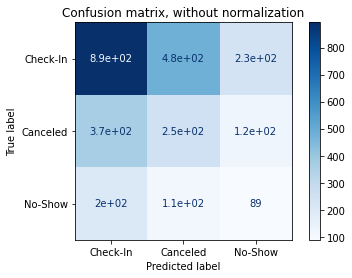

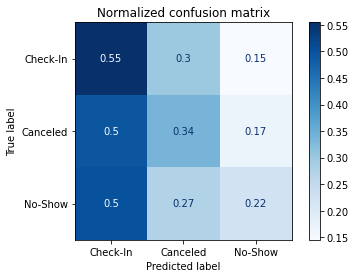

In [39]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Feature Importance
[0.15302366 0.0885873  0.10278402 0.09572906 0.10280803 0.05117962
 0.03519745 0.02967138 0.03090784 0.02906983 0.02059144 0.01980386
 0.00017746 0.01383674 0.00871891 0.01642389 0.01294555 0.02031292
 0.016621   0.01565205 0.01517511 0.01865514 0.01919121 0.01737372
 0.01492027 0.01140189 0.02139564 0.01784501]


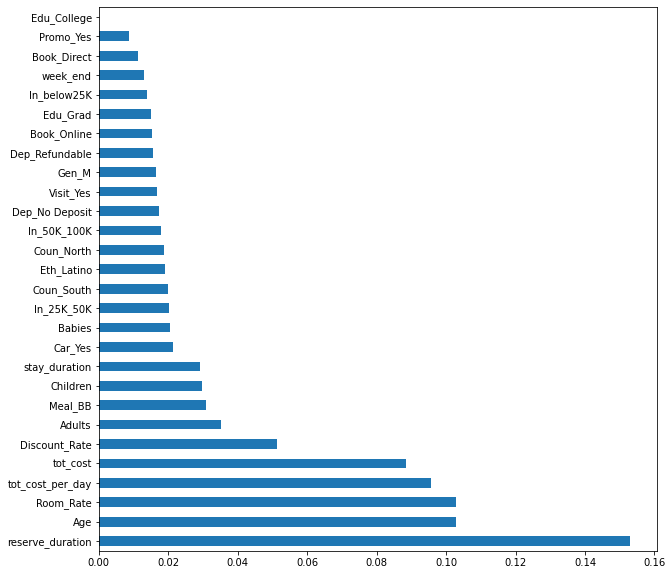

['reserve_duration', 'Age', 'Room_Rate', 'tot_cost_per_day', 'tot_cost', 'Discount_Rate', 'Adults', 'Meal_BB', 'Children', 'stay_duration', 'Car_Yes', 'Babies', 'In_25K_50K', 'Coun_South', 'Eth_Latino', 'Coun_North', 'In_50K_100K', 'Dep_No Deposit', 'Visit_Yes', 'Gen_M', 'Dep_Refundable', 'Book_Online', 'Edu_Grad', 'In_below25K', 'week_end', 'Book_Direct', 'Promo_Yes', 'Edu_College']
28


In [40]:
#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(47).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:44]
selected_features = results['columns'][:28].tolist()
print(selected_features)
print(len(selected_features))

In [35]:
selected_features = ['reserve_duration', 'tot_cost', 'Room_Rate', 'tot_cost_per_day', 'Age', 'Discount_Rate', 'Adults', 'Children', 'Meal_BB', 'stay_duration', 'Babies', 'Coun_South', 'Edu_College', 'In_below25K', 'Promo_Yes', 'Gen_M', 'week_end', 'In_25K_50K', 'Visit_Yes', 'Dep_Refundable', 'Book_Online', 'Coun_North', 'Eth_Latino', 'Dep_No Deposit', 'Edu_Grad', 'Book_Direct', 'Car_Yes', 'In_50K_100K']


##XGB Boost Approach

In [70]:
clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
#clf = DecisionTreeClassifier( max_depth = 50, class_weight = 'balanced', max_features = 'log2', random_state = 8  )
#model=xgboost.XGBClassifier(base_estimator=clf,max_depth=20,n_estimators=15,objective='multi:softmax',gamma=4.63,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label) # day 2 second submission model
model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 22, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.05, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model
#model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 19, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.24, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model

y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.9637421151798149
Validation accuracy : 0.4634412513641324
Precision : 0.323205802626113
Recall : 0.3260933589751593
F1-Score : 0.32237316574933145
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1610
           1       0.26      0.23      0.25       741
           2       0.12      0.08      0.10       398

    accuracy                           0.46      2749
   macro avg       0.32      0.33      0.32      2749
weighted avg       0.43      0.46      0.45      2749

Confusion Matrix
[[1070  374  166]
 [ 494  171   76]
 [ 259  106   33]]


Confusion matrix, without normalization
[[1070  374  166]
 [ 494  171   76]
 [ 259  106   33]]
Normalized confusion matrix
[[0.66459627 0.23229814 0.10310559]
 [0.66666667 0.23076923 0.1025641 ]
 [0.65075377 0.26633166 0.08291457]]


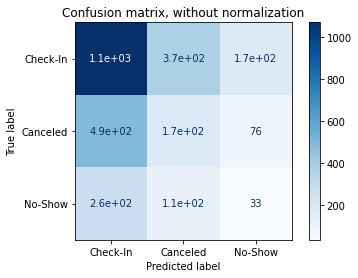

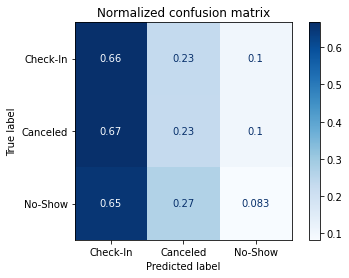

In [71]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


Feature Importance
[0.00938519 0.00901144 0.00935158 0.00888289 0.00920785 0.0092671
 0.01007036 0.00856156 0.01268241 0.00970933 0.00859753 0.01061335
 0.01029411 0.00988167 0.00896911 0.00906738 0.00917875 0.00933467
 0.0093548  0.00923854 0.00943735 0.0090448  0.0091553  0.00920322
 0.00879535 0.00901972 0.00946203 0.00917535 0.00919815 0.00908225
 0.00866043 0.00988227 0.00981438 0.00980525 0.541726   0.06526121
 0.         0.00948114 0.         0.00943249 0.00907647 0.0092856
 0.00860859 0.00884191 0.00914356 0.00874772 0.        ]


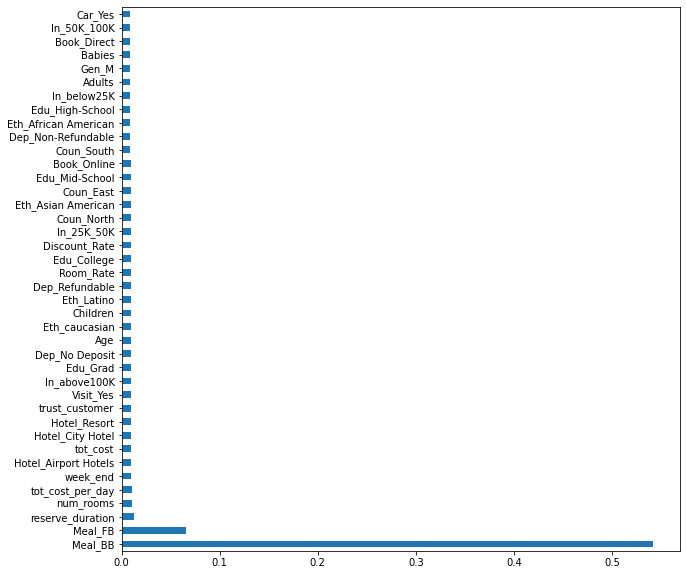

['reserve_duration', 'num_rooms', 'tot_cost_per_day', 'week_end', 'Hotel_Airport Hotels', 'tot_cost', 'Hotel_City Hotel', 'Hotel_Resort', 'trust_customer', 'Visit_Yes', 'In_above100K', 'Edu_Grad', 'Dep_No Deposit', 'Age', 'Eth_caucasian', 'Children', 'Eth_Latino', 'Dep_Refundable', 'Room_Rate', 'Edu_College', 'Discount_Rate', 'In_25K_50K', 'Coun_North', 'Eth_Asian American', 'Coun_East', 'Edu_Mid-School', 'Book_Online', 'Coun_South', 'Dep_Non-Refundable', 'Eth_African American', 'Edu_High-School', 'In_below25K', 'Adults', 'Gen_M', 'Babies', 'Book_Direct', 'In_50K_100K', 'Car_Yes', 'Coun_West', 'Book_Agent', 'not_trust_customer', 'stay_duration', 'Prev_can_Yes', 'Meal_HB', 'Promo_Yes']


In [68]:
#Feature Importance in XGBoost
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[2:]
selected_features = results['columns'][2:].tolist()
print(selected_features)

##Support Vector Machine Approach

In [ ]:

model = svm.SVC(degree=5,decision_function_shape='ovo', class_weight = 'balanced')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
#Feature Importance in XGBoost
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[2:]
selected_features = results['columns'][2:].tolist()
print(selected_features)

##MLP classifier approach

In [64]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',learning_rate = 'adaptive',learning_rate_init=0.01,activation= 'relu', alpha=1e-6, hidden_layer_sizes=(150, ), random_state=91,max_iter=400)
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.41264848038010976
Validation accuracy : 0.37140778464896324
Precision : 0.3573782652679491
Recall : 0.35776231557195876
F1-Score : 0.33108676553798505
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.42      0.50      1610
           1       0.31      0.24      0.27       741
           2       0.16      0.41      0.23       398

    accuracy                           0.37      2749
   macro avg       0.36      0.36      0.33      2749
weighted avg       0.46      0.37      0.40      2749

Confusion Matrix
[[680 322 608]
 [278 177 286]
 [162  72 164]]


##Random Forest approach

In [33]:
#model = RandomForestClassifier(max_depth=7,max_features=10,n_estimators=75, class_weight = 'balanced' )
model = RandomForestClassifier(max_depth = 12, n_estimators = 115, class_weight = 'balanced', random_state = 39  )
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8822970426804293
Validation accuracy : 0.4267006184066933
Precision : 0.3436850452745497
Recall : 0.3463019562429656
F1-Score : 0.34019120621358073
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1610
           1       0.29      0.41      0.34       741
           2       0.14      0.12      0.13       398

    accuracy                           0.43      2749
   macro avg       0.34      0.35      0.34      2749
weighted avg       0.45      0.43      0.43      2749

Confusion Matrix
[[822 580 208]
 [355 304  82]
 [194 157  47]]


Confusion matrix, without normalization
[[822 580 208]
 [355 304  82]
 [194 157  47]]
Normalized confusion matrix
[[0.51055901 0.36024845 0.12919255]
 [0.47908232 0.41025641 0.11066127]
 [0.48743719 0.39447236 0.11809045]]


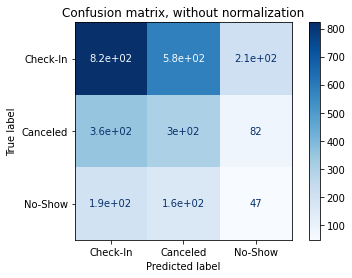

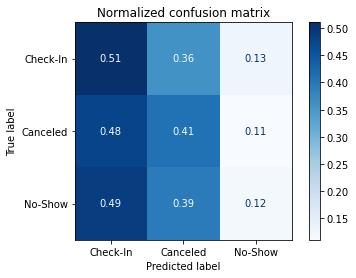

In [34]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Feature Importance
[0.08584866 0.03793096 0.02688872 0.01923623 0.04672821 0.09445047
 0.01485588 0.03326261 0.16131474 0.01714245 0.01208127 0.01162939
 0.01195224 0.0112702  0.01401106 0.01229349 0.01257382 0.01243994
 0.01362323 0.01258157 0.01349531 0.01149027 0.01256036 0.01250653
 0.01455315 0.01276202 0.0136999  0.0128383  0.01425294 0.05031764
 0.03339296 0.01233007 0.01585412 0.01112389 0.01168173 0.00827472
 0.01096204 0.01208913 0.01254293 0.01470582 0.01518509 0.01126594]


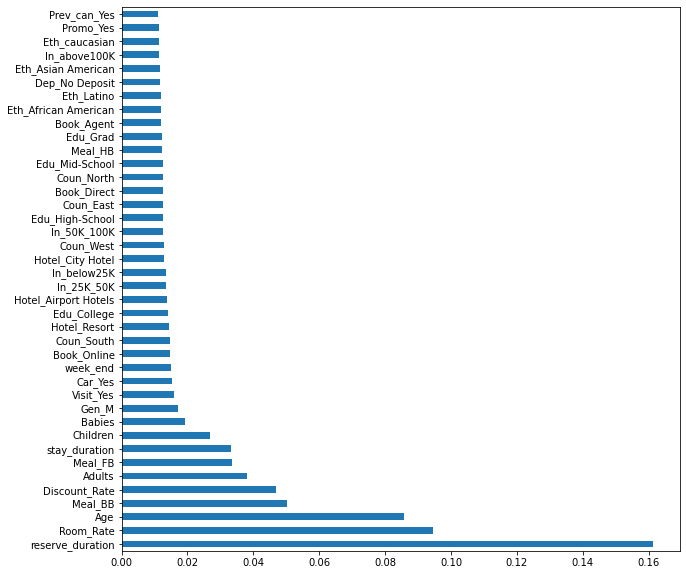

['reserve_duration', 'Room_Rate', 'Age', 'Meal_BB', 'Discount_Rate', 'Adults', 'Meal_FB', 'stay_duration', 'Children', 'Babies', 'Gen_M', 'Visit_Yes', 'Car_Yes', 'week_end', 'Book_Online', 'Coun_South', 'Hotel_Resort', 'Edu_College', 'Hotel_Airport Hotels', 'In_25K_50K']


In [35]:
#Feature Importance in Random Forest
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:30]
selected_features = results['columns'][:20].tolist()
print(selected_features)

##KNN approach

In [66]:
model=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 1.0
Validation accuracy : 0.4219716260458348
Precision : 0.3212005365678779
Recall : 0.3208768027978497
F1-Score : 0.3209910453437807
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1610
           1       0.24      0.25      0.25       741
           2       0.14      0.14      0.14       398

    accuracy                           0.42      2749
   macro avg       0.32      0.32      0.32      2749
weighted avg       0.42      0.42      0.42      2749

Confusion Matrix
[[917 475 218]
 [440 187 114]
 [233 109  56]]


Confusion matrix, without normalization
[[990 415 205]
 [426 208 107]
 [215 114  69]]
Normalized confusion matrix
[[0.61490683 0.25776398 0.12732919]
 [0.57489879 0.28070175 0.14439946]
 [0.54020101 0.28643216 0.17336683]]


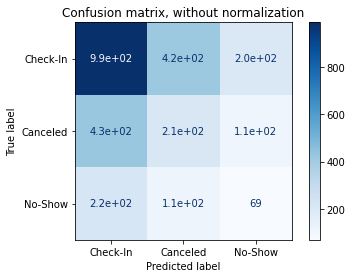

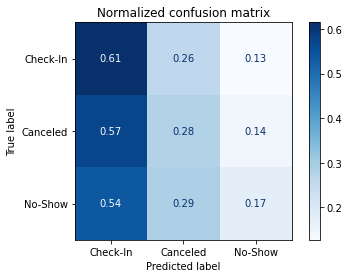

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

##Ensemble - extra tree classifier approach

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=12,n_estimators=100, class_weight = 'balanced')
model.fit(train_data, train_label)
y_predict= model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8600638977635783
Validation accuracy : 0.45180065478355763
Precision : 0.3508459196357407
Recall : 0.3517447928151331
F1-Score : 0.35057768866857825
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      1610
           1       0.30      0.34      0.32       741
           2       0.15      0.13      0.14       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.46      0.45      0.45      2749

Confusion Matrix
[[937 471 202]
 [387 252 102]
 [219 126  53]]


##Hypertuning the model

In [242]:
#Hypertuning Parameters for Accuracy F1score and AUC score
#max_depth
#learning_rate
#min_child_weight 
#gamma 4.63
#colsample_bytree
#scale_pos_weight 
#subsample
#reg_lambda
#x=np.linspace(3,25,num=23,dtype=int)
x=np.linspace(0,500,num=1001,dtype=int)
train_acc = []
val_acc = []
F = []
#clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
#x = [True, False]
for i in x:
     print(i)
     #model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 19, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = i, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model
     #model = DecisionTreeClassifier( max_depth = 20, class_weight = 'balanced', max_features = 'log2', random_state = 8  ).fit(train_data,train_label)
     #model = RandomForestClassifier(max_depth = 12, n_estimators = 115, class_weight = 'balanced', random_state = 39  ).fit(train_data,train_label)  # 115
     model = DecisionTreeClassifier(max_depth = None, min_samples_split=i, class_weight = 'balanced', max_features = 'log2', random_state = 29  ).fit(train_data,train_label)
     y_pred= model.predict(val_data)
     f=f1_score(val_label,y_pred ,average='macro', zero_division=0)
     F.append(f)
     #auc=roc_auc_score(val_label,y_pred,average='macro')
     #AUC.append(auc)
     train_acc.append(model.score(train_data,train_label))
     val_acc.append(model.score(val_data,val_label))
     if f > 0.3697:
       print("improvement")
 #ploting hypertuning results
 
import matplotlib.pyplot as plt
#plt.plot(x,AUC)
#plt.title('AUC Score')
#plt.ylabel('Auc')
#plt.xlabel('Parameters')
#plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,train_acc)
plt.title('Train accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,val_acc)
plt.title('Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()

print("Maximum Training Acc : "+str(max(train_acc)))
print(x[train_acc.index(max(train_acc))])

print("Maximum Validation Acc : "+str(max(val_acc)))
print(x[val_acc.index(max(val_acc))])

print("Maximum F1 Score : "+str(max(F)))
print(x[F.index(max(F))])




0


ValueError: ignored

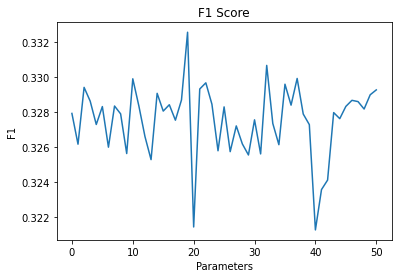

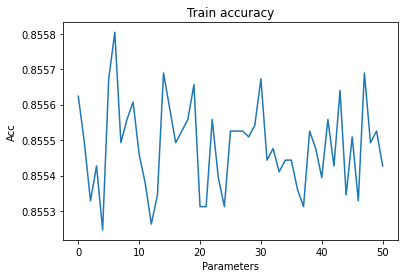

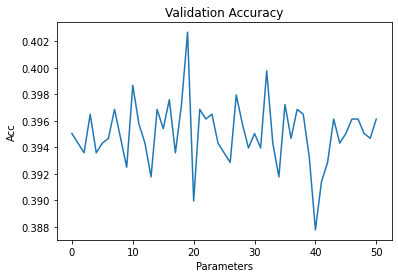

Maximum Training Acc : 0.85580404685836
6
Maximum Validation Acc : 0.4026918879592579
19
Maximum F1 Score : 0.32789929472167473
19


In [79]:
import matplotlib.pyplot as plt
x=x[:len(F)]
#plt.plot(x,AUC)
#plt.title('AUC Score')
#plt.ylabel('Auc')
#plt.xlabel('Parameters')
#plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,train_acc)
plt.title('Train accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,val_acc)
plt.title('Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()

print("Maximum Training Acc : "+str(max(train_acc)))
print(x[train_acc.index(max(train_acc))])

print("Maximum Validation Acc : "+str(max(val_acc)))
print(x[val_acc.index(max(val_acc))])

print("Maximum F1 Score : "+str(max(F)))
print(x[F.index(max(F))])

In [ ]:
print(x[F.index(max(F))])

ValueError: ignored

##Neptune log order of Models

In [ ]:
model_list=['logistic regression','Decision Tree Classifier', 'XGB Boost','MLP classifier', 'Random Forest', 'KNN', 'Ensemble - extra tree classifier'  ]
for i in model_list:
  neptune.log_text('Model order',i)
  

In [ ]:
neptune.stop()

#Prediction For submission

In [41]:
y_predict_2= model.predict(test_data)
y_predict_2


array([0, 0, 0, ..., 1, 0, 2])

In [42]:
y_predict_2=le.inverse_transform(y_predict_2)
y_predict_2

array([1, 1, 1, ..., 2, 1, 3], dtype=object)

In [43]:
y_predict_2=pd.DataFrame(y_predict_2,columns=['Reservation_status'] )
y_predict_2

,Reservation_status
0,1
1,1
2,1
3,1
4,1
...,...
4313,3
4314,1
4315,2
4316,1


In [44]:
test_reservation=pd.DataFrame(test_reservation)
test_reservation

,Reservation-id
0,62931593
1,70586099
2,4230648
3,25192322
4,80931528
...,...
4313,39110574
4314,5496554
4315,59004046
4316,65838682


In [45]:
test_reservation=pd.concat([test_reservation,y_predict_2],axis=1)
test_reservation

,Reservation-id,Reservation_status
0,62931593,1
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,3
4314,5496554,1
4315,59004046,2
4316,65838682,1


In [47]:
test_reservation.to_csv('submission_DecisionTree_upsampled_0.33_0.33_0.33_hypertuned_28features.csv',index=False)